# Exercise 3: Twitter Sentiment Analysis
## Vasileios Papadopoulos

This assignment is part of Natural Language Process course of M.Sc in Artificial Intelligence from the University of Piraeus

## Setup

Install TexBlob using pip and import all necessary modules

In [48]:
# !pip3 install textblob

from textblob import TextBlob
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt  

## Read the test dataset from the file provided in the link above

In [2]:
import pandas as pd
import numpy as np

file = 'twitter-2016test-A-clean.tsv'
bloblist = list()

df = pd.read_csv(file ,sep='\t')
print(df.shape)
df.head()

(15651, 3)


,tweet_id,sentiment,text
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...
2,619974445185302528,neutral,If you could ask an onstage interview question...
3,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...
4,619994586182619136,positive,"Excited to read ""Go Set a Watchman"" on Tuesday..."


### Labels Distribution

<AxesSubplot:>

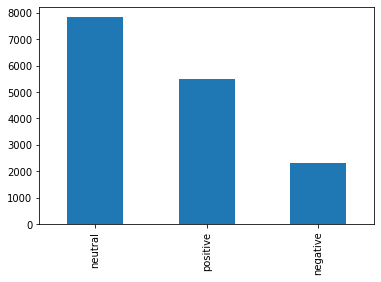

In [75]:
df['sentiment'].value_counts().plot.bar()

## For each tweet in the dataset you need to create a TextBlob object

In [3]:
'''For every tweet-text create a TextBlob and append into list'''
blobs = []
for index in df.index:
    blobs.append(TextBlob(df['text'][index]))


##  Read the documentation and find which attribute contains the polarity.

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). 
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]

In [4]:
print(f'First tweet Polarity and Subjectivity {blobs[0].sentiment}')

First tweet Polarity and Subjectivity Sentiment(polarity=-0.1, subjectivity=0.3)


## Return the polarity of each tweet in terms of positive, negative or neutral (make sure you document your assumptions)

We extract informative features

In [5]:
'''Calculate and store polarity for every tweet'''
polarities = []
subjectivities = []
for b in blobs:
    polarities.append(b.sentiment.polarity)
    subjectivities.append(b.sentiment.subjectivity)

#append polarity and subjectivity into dataframe
df['polarity'] = np.array(polarities)
df['subjectivity'] = np.array(subjectivities)
df.head()

,tweet_id,sentiment,text,polarity,subjectivity
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",-0.100000,0.300000
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,-0.208333,0.166667
2,619974445185302528,neutral,If you could ask an onstage interview question...,0.000000,0.000000
3,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,0.800000,0.750000
4,619994586182619136,positive,"Excited to read ""Go Set a Watchman"" on Tuesday...",0.255682,0.625000


## Calculate the accuracy, precision, recall and f-score of the classification

We will use polarity feature as independent variable to classify tweet's sentiment. The are 3 classes [Negative, Neutral, Positive]

In [15]:
'''Prepare datase get X and Y '''
X = np.array(df['polarity'])
y = np.array(df['sentiment'])
X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)


# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')

X_train shape is (11738, 1)
X_test shape is (3913, 1)


In [64]:
# Grid search k-fold Cross Calidation to find best estimator
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs=-1, verbose=1)
clf.fit(X=X_train, y=y_train)
dtree_model = clf.best_estimator_
print(dtree_model)

Fitting 100 folds for each of 17 candidates, totalling 1700 fits
DecisionTreeClassifier(max_depth=9)


In [65]:
# model accuracy for X_train 
accuracy = dtree_model.score(X_train, y_train)
print(f'Train set accuracy is {accuracy}')

y_pred = dtree_model.predict(X_test)

labels = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_test, y_pred, target_names=labels))

Train set accuracy is 0.5981427841199523
              precision    recall  f1-score   support

    Negative       0.49      0.10      0.16       598
     Neutral       0.57      0.83      0.68      1921
    Positive       0.65      0.46      0.54      1394

    accuracy                           0.59      3913
   macro avg       0.57      0.46      0.46      3913
weighted avg       0.59      0.59      0.55      3913



## Return the confusion matrix for the results

In [62]:
# creating a confusion matrix
y_pred = dtree_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  78  460   60]
 [  63 1607  251]
 [  30  775  589]]


## Show the confusion matrix graphically

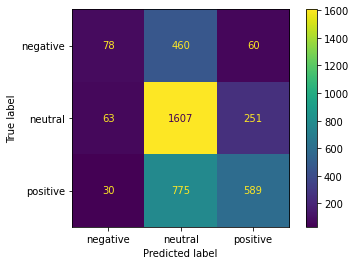

In [63]:
plot_confusion_matrix(dtree_model, X_test, y_test)  
plt.show()  